**Problem Statement**


**Dataset: NBA Rookie**


**Classification Exercise**


Predict 5-Year Career Longevity for NBA Rookies y = 0 if career years played < 5 y = 1 if career years played >= 5




**Import Libraries/Dataset**



1.   Download the dataset
2.   Import the required libraries







In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import pickle
import requests
import joblib


In [11]:
df = pd.read_csv('nba_logreg.csv')

**SECTION 1** : **Data Visualization and Exploration**

1.	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.



In [ ]:
df.head(2)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0


This includes both the independent variables (predictors) and the dependent variable (target). In the context of our dataset, the features include player statistics like GP (Games Played), MIN (Minutes Played), PTS (Points Per Game), etc., and the target variable TARGET_5Yrs which indicates whether a player lasted 5 years in the league

2.	Comment on class imbalance with appropriate visualization method.

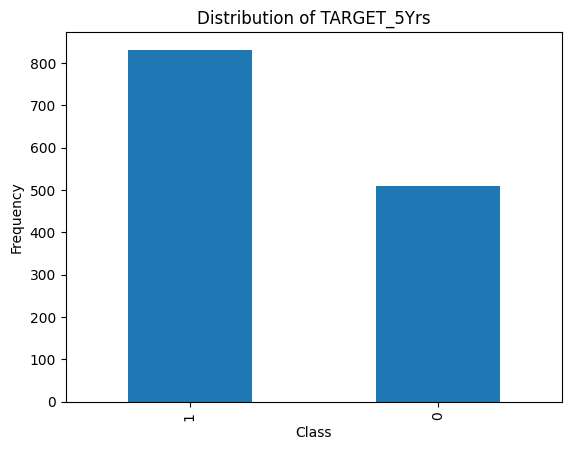

In [14]:
df['TARGET_5Yrs'].value_counts().plot(kind='bar')
plt.title('Distribution of TARGET_5Yrs')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Class imbalance refers to a situation where the number of instances of one class (or target outcome) significantly outweighs the number of instances of other classes in the dataset.

In the context of our dataset, it mean that the number of players who lasted 5 years in the league (represented as 1 in TARGET_5Yrs) is much higher than those who did not (represented as 0).


3.	Provide appropriate visualizations to get an insight about the dataset.


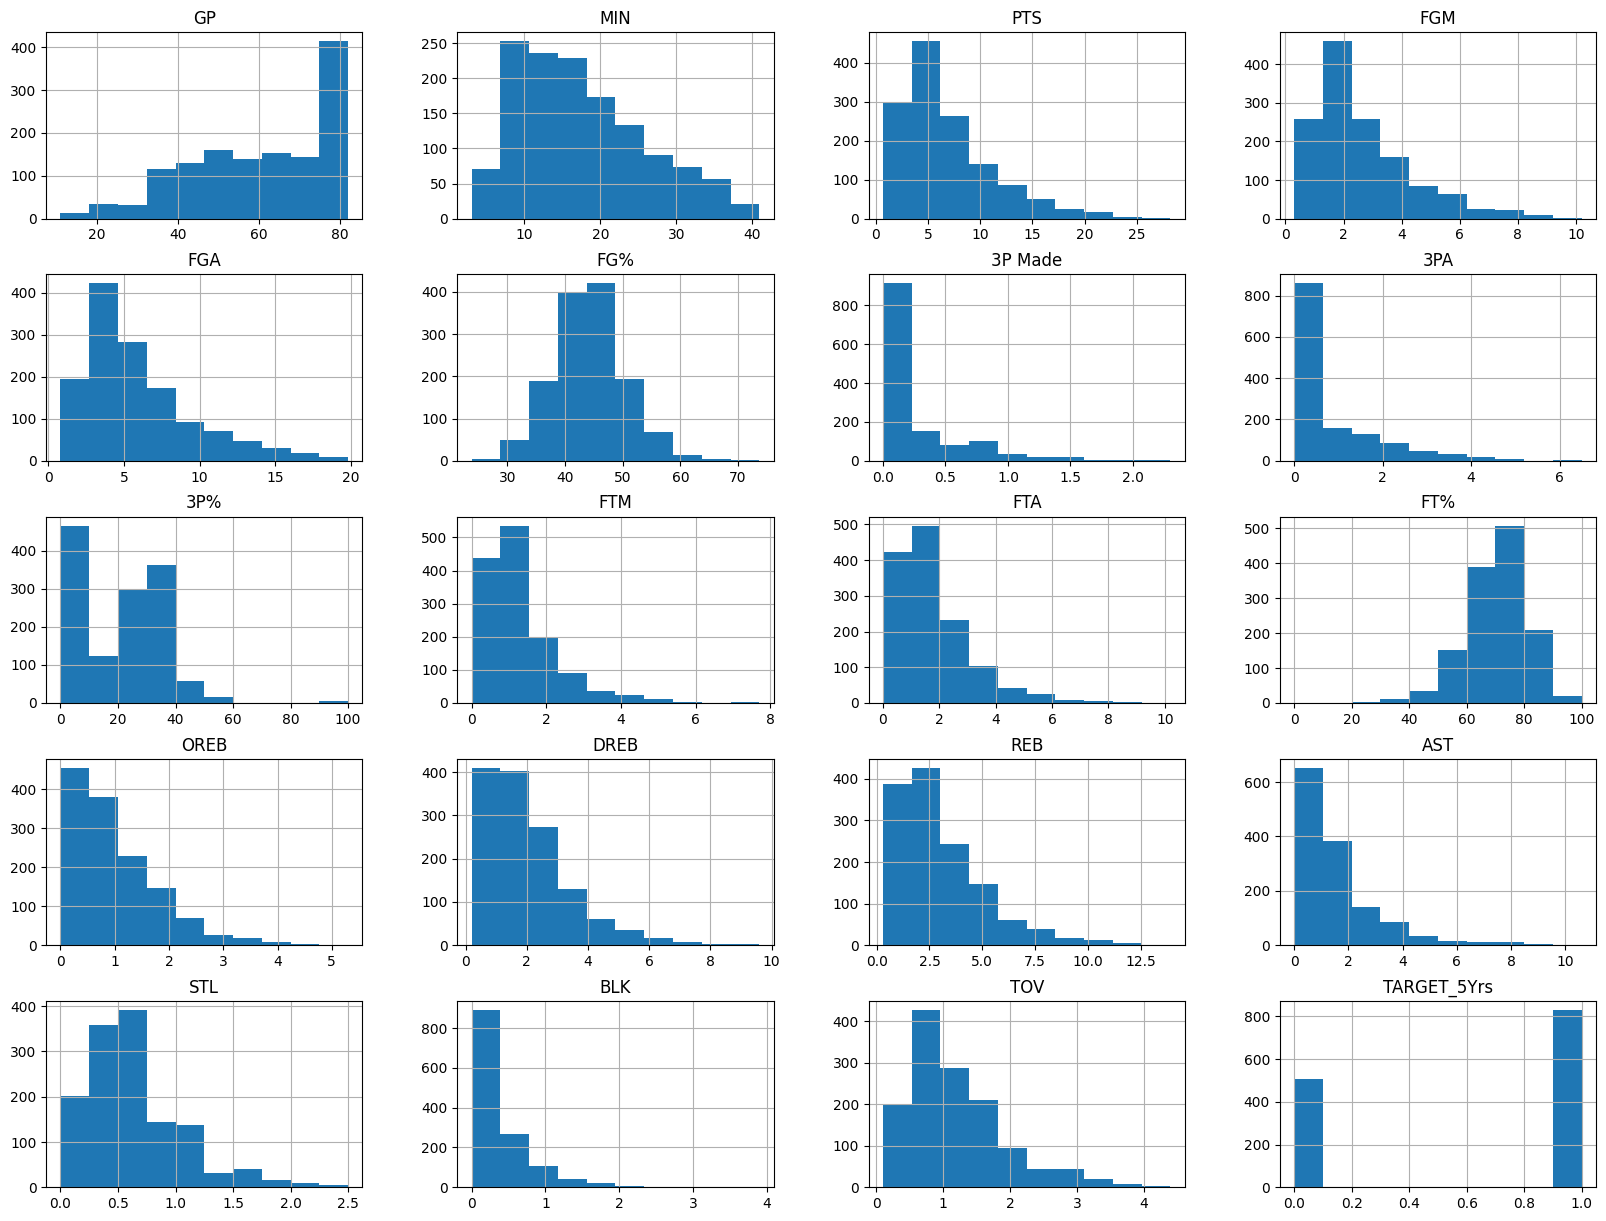

In [ ]:
df.hist(figsize=(20, 15))
plt.show()

Histograms above represent the distribution of numerical features. They show how many players fall into each range of values for features like points per game, minutes played, etc.

Box Plots above give a summary of the distribution of these features while highlighting outliers — points significantly different from the rest of the data.

**Why it's important**

These visualizations help in understanding the underlying distribution of each feature, spotting outliers, and identifying features that might require transformation (like normalization or scaling). They provide a foundation for preprocessing decisions and feature engineering.

4.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.


# Features reduction based on correlation



In [18]:
# Replace NULL or missing values with 0
df_filled = df.fillna(0)
# Check for missing values in df_filled
missing_values = df_filled.isnull().sum()

#Group all the observations by (Target_5yrs)
average_stats = df_filled.groupby('TARGET_5Yrs').mean(numeric_only=True)
average_stats = average_stats.T
average_stats

TARGET_5Yrs,0,1
GP,51.371316,65.304452
MIN,14.252259,19.585319
PTS,5.042829,7.878700
FGM,1.946169,3.047413
FGA,4.542043,6.708063
FG%,42.388802,45.260048
3P Made,0.229666,0.258604
3PA,0.754617,0.794224
3P%,19.149705,19.149579
FTM,0.923379,1.526955


Text(0.5, 1.0, 'Features Values by Label')

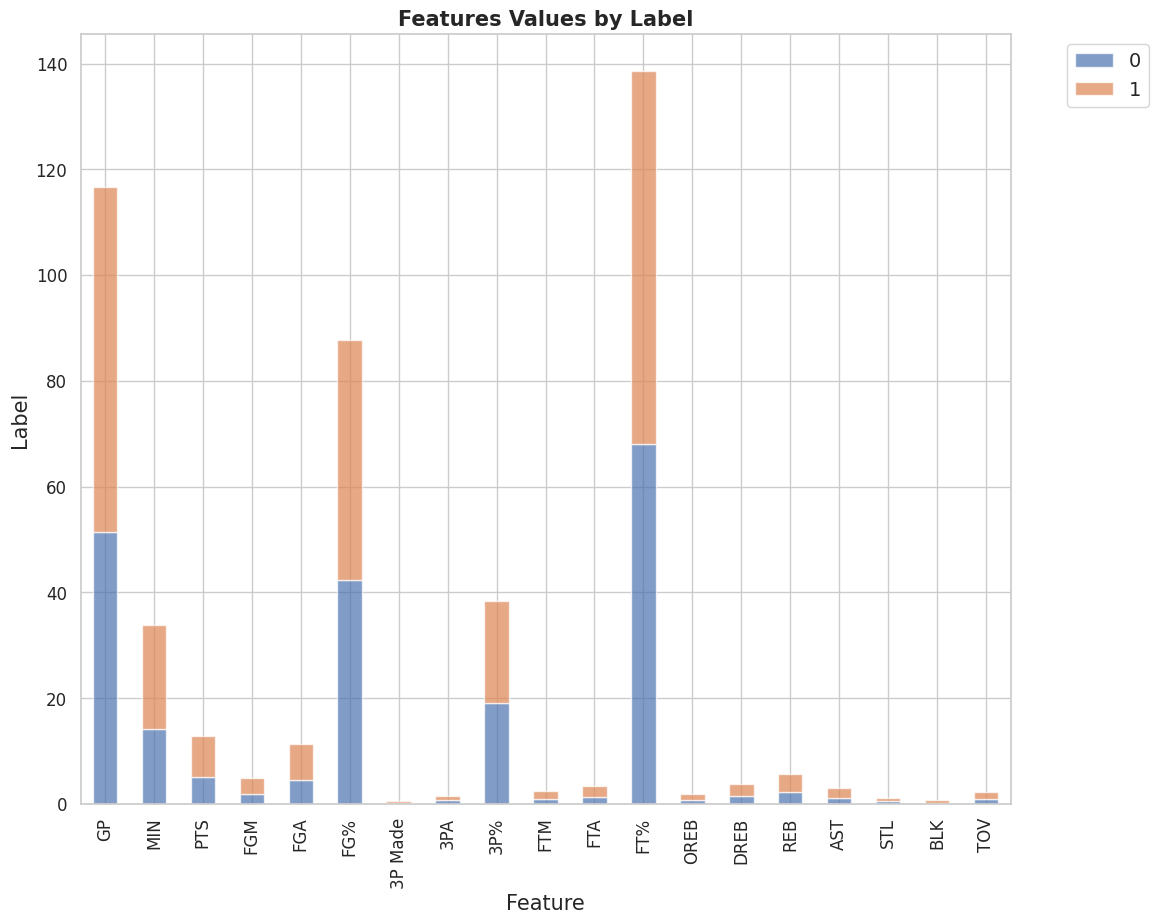

In [19]:
#Visualize the data for insights
sns.set_theme(style="whitegrid")  # Directly use seaborn to set the style

# Assuming 'average_stats' is a DataFrame that you've previously computed
ax = average_stats.plot(kind='bar', stacked=True, figsize=(12, 10), alpha=0.7)

# Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Label', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Features Values by Label', fontsize=15, weight='bold')

In [ ]:
# Calculate the correlation with 'TARGET_5Yrs' for numerical columns only
correlation_map = df.corr(numeric_only=True)['TARGET_5Yrs'].sort_values(ascending=False)
correlation_map

TARGET_5Yrs    1.000000
GP             0.392970
FGM            0.317594
MIN            0.317392
PTS            0.315981
REB            0.299406
FTM            0.296841
FTA            0.296089
OREB           0.293369
FGA            0.292660
DREB           0.284677
TOV            0.272348
STL            0.229861
FG%            0.227134
BLK            0.210114
AST            0.174527
FT%            0.110613
3P Made        0.036619
3PA            0.018110
3P%           -0.003411
Name: TARGET_5Yrs, dtype: float64

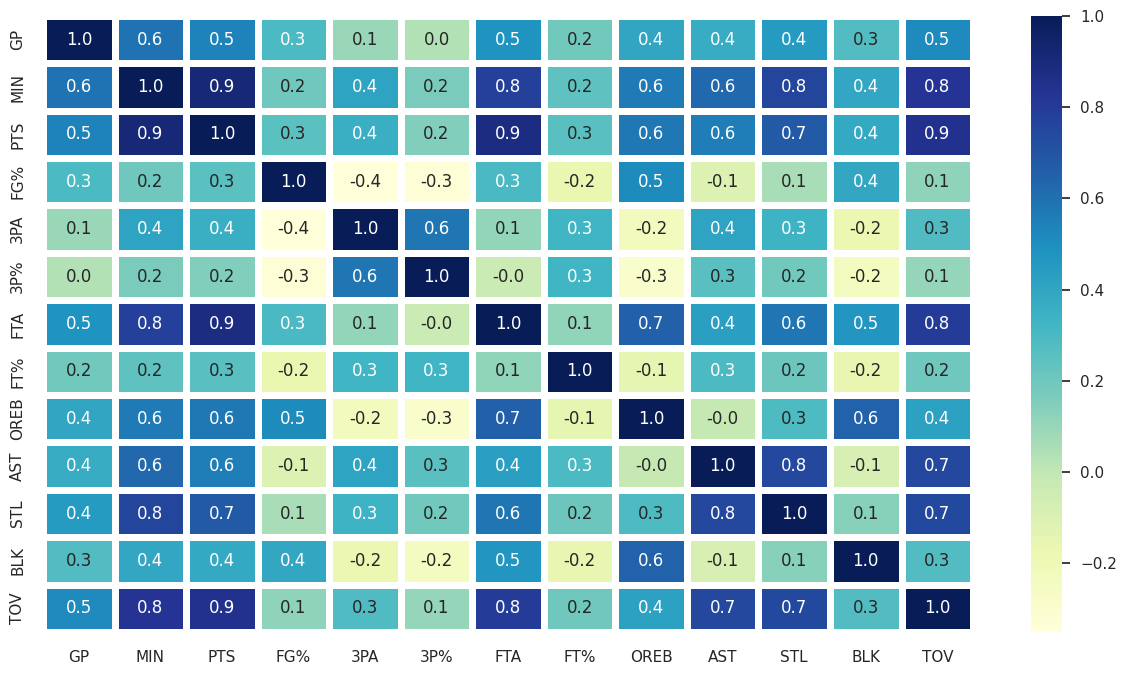

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True, linewidths=5, fmt='.1f', cmap="YlGnBu");

In [ ]:
#Drop correlated features
X = X.drop(['FGA', 'FGM', 'REB', 'FTM', 'DREB','3P Made'], axis=1)
X.head(1)

,GP,MIN,PTS,FG%,3PA,3P%,FTA,FT%,OREB,AST,STL,BLK,TOV
0,NaN,27.4,7.4,34.7,2.1,25.0,2.3,69.9,0.7,1.9,0.4,0.4,1.3


**What it represents**

A heatmap of the correlation matrix displays the strength and direction of the linear relationships between pairs of features. Values close to 1 or -1 indicate strong positive or negative correlations, respectively.

**Why it's important**

This analysis helps in identifying features that are strongly predictive of the target variable and those that are redundant due to high inter-correlations. It guides feature selection and helps in understanding potential multicollinearity, which could affect model performance.

5.	Any other visualization specific to the problem statement.

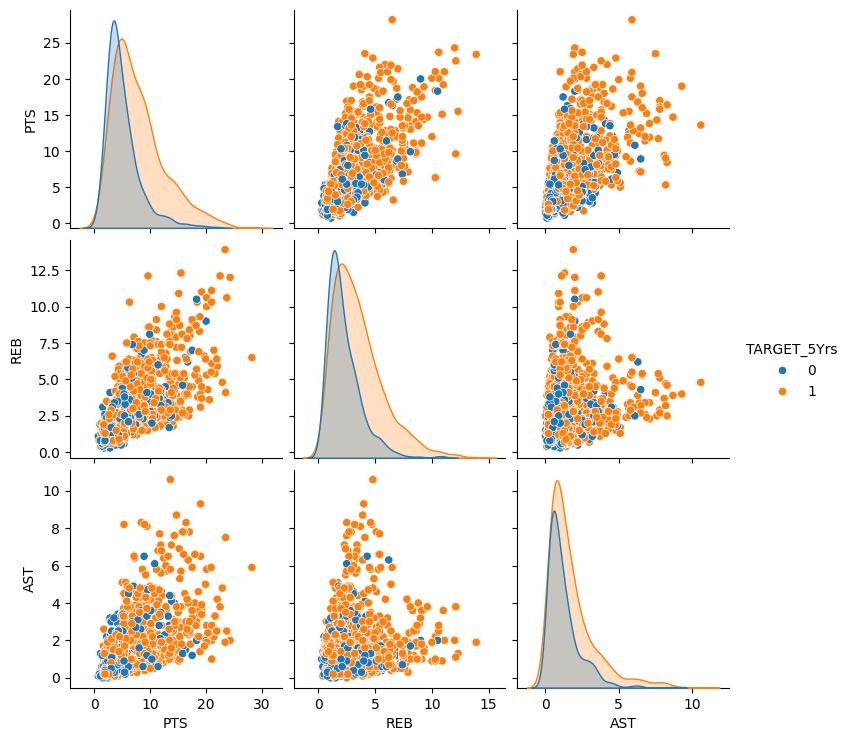

In [ ]:
sns.pairplot(df[['PTS', 'REB', 'AST', 'TARGET_5Yrs']], hue='TARGET_5Yrs')
plt.show()

**What it represents**

Pair plots show bivariate relationships between combinations of features, colored by the target variable. In the context of your dataset, it could show how points, rebounds, and assists vary with the likelihood of a player lasting 5 years in the league.

**Why it's important**

Such visualizations are tailored to the specific problem and can uncover patterns and relationships that are pivotal for hypothesis generation and predictive modeling. They provide insights that are directly relevant to the case study’s objectives.

**SECTION 2** : **Data Pre-processing and cleaning**

1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.
2.	Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.  Explore a few techniques for identifying feature importance for your feature engineering task.



In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Name            0
GP              9
MIN             4
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%            12
OREB            4
DREB            0
REB             0
AST             3
STL             3
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


We here identify and deal with missing data points in the dataset to prevent the machine learning algorithm from being fed with inaccurate or incomplete data.

# Data Pre Processing Steps

**Identify Missing Values**

We use methods like isnull() in pandas to identify missing values.

**Handling Missing Values**

We filled in the missing values with a fixed value (like 0)

In [17]:
# Replace NULL or missing values with 0
df_filled = df.fillna(0)
# Check for missing values in df_filled
missing_values = df_filled.isnull().sum()
print(missing_values)

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


Handling missing values is necessary because most machine learning algorithms do not work well with missing data. Filling missing values with zeros was chosen based on the instruction provided.

# Handling of outliers

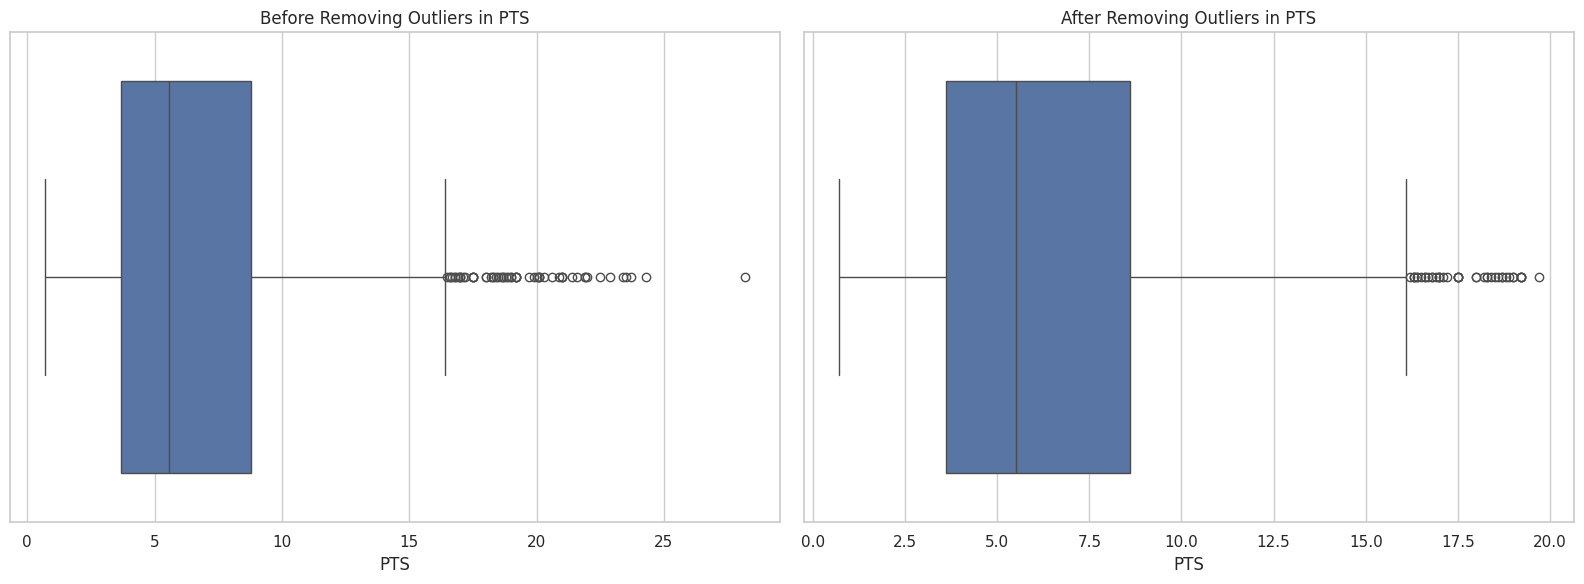

In [23]:
# Assuming 'PTS' is the column you're interested in
column = 'PTS'

# Calculate Z-scores
z_scores = stats.zscore(df[column].dropna())

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.abs(z_scores) > threshold

# Plotting before removing outliers
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df[column])
plt.title(f'Before Removing Outliers in {column}')

# Removing outliers
df_no_outliers = df[~df.index.isin(np.where(outliers)[0])]

# Plotting after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers[column])
plt.title(f'After Removing Outliers in {column}')

plt.tight_layout()
plt.show()


The two boxplots represent the distribution of the 'PTS' (Points Per Game) data from our dataset, before and after outlier removal.

**Before Removing Outliers (Left Boxplot)**

The central box represents the interquartile range (IQR), which contains the middle 50% of the scores. The bottom and top of the box indicate the first quartile (Q1) and third quartile (Q3), respectively.
The horizontal line inside the box shows the median of the dataset, which is the middle value.
The "whiskers" (the lines extending from the top and bottom of the box) typically extend to the furthest points within 1.5 times the IQR from the Q1 and Q3.
The individual points outside the whiskers represent outliers, which are unusually high or low values compared to the rest of the data.

**After Removing Outliers (Right Boxplot)**

The same components (IQR, median, whiskers) are displayed. However, you'll notice there are fewer points outside the whiskers. This indicates that the outliers have been removed from the dataset.
The range of the y-axis is smaller, suggesting that the extreme values (outliers) that were present before have been excluded, leading to a more compressed scale.

# Identify and Handle Skewed Data:

Our below code identifies columns in the dataframe df that are skewed beyond a certain threshold. For the identified skewed features, a log transformation (np.log1p) is applied, which is the natural logarithm (log) plus 1 (1p) to handle zero values.

In [24]:
# Only select numeric columns for skewness calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

# Define a threshold for what we consider a significant skew
skew_limit = 1
high_skew = skewed_cols[abs(skewed_cols) > skew_limit]
skewed_features = high_skew.index

# Apply transformations to skewed columns
# We use the .loc method to ensure we are not getting a SettingWithCopyWarning
for col in skewed_features:
    df.loc[:, col] = df[col].apply(lambda x: np.log1p(x) if x > 0 else x)


The code we provided below is intended to visualize the original and transformed distributions for the 'PTS' column, assuming 'PTS' is representative of the points per game and is right-skewed.

It uses sns.histplot for histogram to show the effect of log transformation on the data distribution.

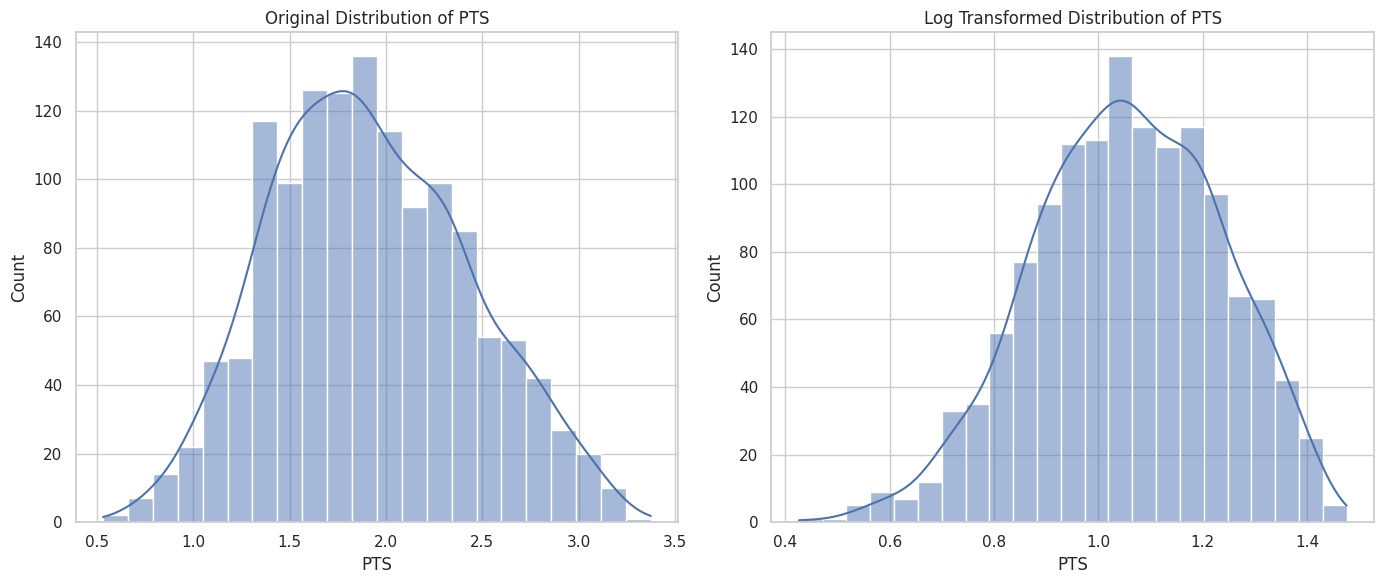

In [28]:
col = 'PTS'

# Apply log transformation to the column

transformed_col = df[col].apply(lambda x: np.log1p(x) if x > 0 else x)

# Visualize the original and transformed distributions with histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True)
plt.title(f'Original Distribution of {col}')

plt.subplot(1, 2, 2)
sns.histplot(transformed_col, kde=True)
plt.title(f'Log Transformed Distribution of {col}')

plt.tight_layout()
plt.show()



# Visualization of Skewness:

A histogram is a common visualization to understand the distribution of data. Below we created histogram for PTS column before and after transformation:

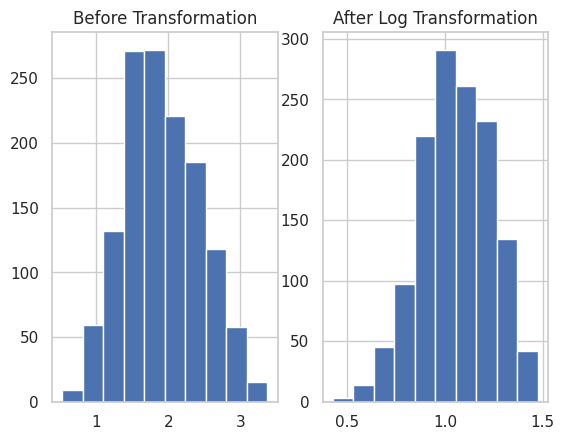

In [27]:
# Example column to be visualized
col = 'PTS'

# Histogram before transformation
plt.subplot(1, 2, 1)
df[col].hist()
plt.title('Before Transformation')

# Histogram after transformation
plt.subplot(1, 2, 2)
np.log1p(df[col]).hist()
plt.title('After Log Transformation')

plt.show()


# Data Balancing:

Data balancing is a critical preprocessing step in machine learning, especially when dealing with datasets where the distribution of classes is uneven.

An imbalanced dataset can lead to biased models that perform well on the majority class but poorly on the minority class, which can skew the results and lead to misleading conclusions.

**Our Applied Data Balancing Tasks**

In the context of your dataset, where 'TARGET_5Yrs' indicates whether a player lasted 5 years in the league, balancing this target variable is essential to ensure that the machine learning models can learn to predict both classes effectively.

**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE is a popular method for handling class imbalance. It works by creating synthetic samples from the minority class, thus balancing the class distribution without losing valuable data.




# Effects on Model Evaluation Parameters:

**Improved Accuracy**: Balancing the data can help achieve higher accuracy, especially for models where the minority class is of significant interest.

**Better Recall and Precision**: It helps in improving recall for the minority class without sacrificing precision, leading to a more reliable performance across classes.

**AUC-ROC Improvement**: Balanced data can lead to better AUC-ROC scores, indicating a better model performance in distinguishing between the classes..

In [ ]:
# Assuming 'TARGET_5Yrs' is the target variable and excluding non-numeric columns (e.g., 'Name')
X_numeric = df_filled.select_dtypes(include=[np.number])
y = df_filled['TARGET_5Yrs']

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_numeric)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_numeric)

# Display the first few rows to check the transformation
print("Standardized data sample:")
print(X_standardized[:5])

print("\nNormalized data sample:")
print(X_normalized[:5])


Standardized data sample:
[[-3.32461480e+00  1.17879014e+00  1.37400972e-01 -1.72939657e-02
   4.77347202e-01 -1.54340729e+00  6.58041466e-01  1.24435398e+00
   3.64603047e-01  3.06333247e-01  3.61484393e-01  2.22385337e-02
  -3.94206280e-01  1.01085236e+00  5.17996715e-01  2.38075434e-01
  -5.28697072e-01  7.32541811e-02  1.47337949e-01 -1.27773744e+00]
 [-1.38564203e+00  1.11889499e+00  9.14864329e-02 -3.73815719e-01
   2.26800688e-01 -2.37465053e+00  1.17949360e+00  1.90382854e+00
   2.71121049e-01  1.31963009e+00  1.19324836e+00  5.52509744e-01
  -6.51130606e-01 -1.89380431e-02 -3.08447126e-01  1.46142002e+00
   1.17666006e+00  3.06414757e-01  5.62694579e-01 -1.27773744e+00]
 [ 7.74927624e-01 -2.70672428e-01 -3.67658961e-01 -3.73815719e-01
  -3.29969344e-01 -3.20990767e-01  3.97315397e-01  8.67511370e-01
   3.27210248e-01 -4.02974543e-01 -3.94664665e-01 -2.10759422e-01
  -6.51130606e-01 -2.39607415e-01 -4.05675814e-01 -3.73596857e-01
  -2.85074625e-01 -1.59906395e-01 -2.68018681e-0

In [ ]:
df_filled.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [ ]:
# Labels and features split
X = df_filled.drop(['Name','TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

In [ ]:
X.head(2)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6


In [ ]:
y.head(1)

0    0
Name: TARGET_5Yrs, dtype: int64

# Justification for Standardization and Normalization:

**Standardization** is used to bring all features to the same scale with a mean of 0 and a standard deviation of 1. This is particularly useful for models that are sensitive to the scale of input data, like SVM and k-NN, as it ensures that no single feature will dominate the model due to its scale.

**Normalization** is applied to rescale the features to a fixed range [0, 1]. This is beneficial for models that require a bounded input space, like neural networks, and can also improve the performance of optimization algorithms used in training by ensuring consistent scales across all input features.

# Section 3 : Model Building Phase

**Case 1:**

Train = 80 % Test = 20% [ x_train1, y_train1] = 80%;
 		[ x_test1, y_test1] = 20%;

**80% Training / 20% Testing**

This is a standard split ratio used in many machine learning projects. The justification for this split is as follows:

**Training Set (80%):**

A larger portion of the data is used for training to ensure that the model has enough data to learn from, capturing the underlying patterns without being too specific to the sample (overfitting).

**Test Set (20%):**

This portion is held back and used to evaluate the model's performance on unseen data, simulating how the model would perform in the real world.




In [ ]:
# Assuming df_filled is our preprocessed DataFrame and 'TARGET_5Yrs' is the target variable
X = df_filled.drop('TARGET_5Yrs', axis=1)
y = df_filled['TARGET_5Yrs']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42)

x_train1.shape, x_test1.shape


((1072, 20), (268, 20))



**Case 2: 10% Training / 90% Testing**

This split is unusual and might be used in specific situations, such as when the dataset is extremely large, and even a small fraction contains enough data to train the model effectively. Here's the rationale:

**Training Set (10%)**

Can be adequate for training if the dataset is very large, ensuring that the model has enough examples to learn from.

**Test Set (90%)**

Provides a very large set for testing, which can be useful for extensive evaluation of the model's performance across various subsets of data.

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.90, random_state=42)
x_train2.shape, x_test2.shape

((134, 20), (1206, 20))

# 2.	Explore k-fold cross validation.



K-fold cross-validation is a technique used to assess the performance of a machine learning model and ensure that it is not just fitted to a single train-test split. Here’s how it works and why it's important:

**How K-fold Cross Validation Works:**

**Split the Data**:  The entire dataset is divided into 'k' equally (or nearly equally) sized folds or segments.

**Model Training and Validation**: The model is trained on k-1 folds and then validated on the remaining fold, providing a performance score for each iteration.

**Repeat the Proces**s: This process is repeated k times, with each fold used exactly once as the validation set.

**Average Performance**: The performance scores from each fold are averaged to obtain a final model performance metric.

**Why Use K-fold Cross Validation:**

**Bias Reduction**: Helps in reducing bias as each data point gets to be in a test set exactly once and gets to be in a training set k-1 times.

**Variance Reduction**: Reduces variance as it uses more data for training the model, compared to a single train-test split, leading to a better estimate of model performance.

**Model Generalization**: Ensures that the model is capable of generalizing well to an independent dataset and not just overfitting to a particular train-test split.

In [ ]:
#Identify and Remove Non-Numeric Columns
X_numeric = X.select_dtypes(include=[np.number])

In [ ]:
#Convert Non-Numeric Columns to Numeric (One-Hot Encoding)
# Identify categorical columns
categorical_columns = X.select_dtypes(exclude=[np.number]).columns

# Create a column transformer with OneHotEncoder for categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # keep the remaining columns untouched
)

X_transformed = column_transformer.fit_transform(X)


In [ ]:

# Prepare the model
model = RandomForestClassifier(random_state=42)

# Use the numeric or transformed dataset for cross-validation
scores = cross_val_score(model, X_transformed, y, cv=10)  # Using k=10 for k-fold cross-validation

print(f'Cross-validation scores: {scores}')
print(f'Mean score: {np.mean(scores)}')


Cross-validation scores: [0.71641791 0.63432836 0.7238806  0.70895522 0.71641791 0.71641791
 0.61940299 0.70149254 0.6641791  0.70149254]
Mean score: 0.6902985074626866


# 3. Build any two appropriate models

For the given dataset, which involves predicting whether basketball players last 5 years in the league based on their stats ('TARGET_5Yrs'), two appropriate models would be Logistic Regression and Random Forest Classifier. Here's why these models are suitable and how to implement them:

**1. Logistic Regression**

**Justification:** Logistic Regression is a good starting point for binary classification problems. It's simple, interpretable, and provides a probabilistic understanding of the class memberships. Given that the target variable is binary ('0' or '1'), logistic regression can directly model the probability of a player lasting 5 years in the league.

**Implementation:**

In [ ]:
# Create a pipeline that includes scaling (without centering) and the logistic regression model
pipeline = make_pipeline(
    StandardScaler(with_mean=False),  # Set with_mean=False for sparse data compatibility
    LogisticRegression(max_iter=1000)
)

# Fit the model on the training data
pipeline.fit(x_train1, y_train1)

# Evaluate the model on the test data
logistic_accuracy = pipeline.score(x_test1, y_test1)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')


Logistic Regression Accuracy: 0.6231343283582089


**2. Random Forest Classifier**

**Justification:**  Random Forest is an ensemble method that can handle both linear and non-linear relationships between features. It's robust to overfitting, can handle a mix of numerical and categorical features, and is good for complex datasets with many features. Random Forest can capture more complex patterns than Logistic Regression, which might result in better performance.

**Implementation:**

In [ ]:
# Assume df_filled is your preprocessed DataFrame
X = df_filled.drop('TARGET_5Yrs', axis=1)
y = df_filled['TARGET_5Yrs']

# Identify categorical columns for encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer with OneHotEncoder for the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # keep the remaining numerical columns unchanged
)

# Apply the transformations and split the data
X_processed = preprocessor.fit_transform(X)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_processed, y, test_size=0.90, random_state=42)

# Create and train the logistic regression model within a pipeline
pipeline = make_pipeline(
    StandardScaler(with_mean=False),  # Scale the data
    LogisticRegression(max_iter=5000)
)
pipeline.fit(x_train2, y_train2)

# Evaluate the model
logistic_accuracy_case2 = pipeline.score(x_test2, y_test2)
print(f'Logistic Regression Accuracy (Case 2): {logistic_accuracy_case2}')


Logistic Regression Accuracy (Case 2): 0.6849087893864013


The results show different accuracy scores for the logistic regression model under the two different train-test split scenarios:

**Case 1 (80% Train / 20% Test):** The model achieved an accuracy of approximately 0.623.
**Case 2 (10% Train / 90% Test):** The model achieved an accuracy of approximately 0.685.

**Comparison and Explanation:**

**Higher Accuracy in Case 2:** It's somewhat counterintuitive to see higher accuracy in Case 2 because usually, having more data for training (as in Case 1) tends to produce a better model. However, the higher accuracy in Case 2 could be due to the model being tested on a much larger set of data, potentially giving a more representative evaluation of its performance.

**Less Training Data in Case 2:** Despite having less training data, the model in Case 2 might have captured the essential patterns in the data sufficiently to generalize well on the larger test set.

**Overfitting in Case 1:** The lower accuracy in Case 1 might indicate overfitting, where the model has learned the training data too closely and is not generalizing well on the test data.

**Choosing the Model:**

**Generalization Over Fit:** The primary goal in machine learning models is to generalize well on unseen data, not just to perform well on the training data. Therefore, the model and training strategy that provide better performance on the test set are usually preferred.

**Consider the Size of the Test Set:** However, considering that Case 2 has a very large test set, the model's performance here might be a better indicator of how it will perform in the real world.


**Recommendation:**

Given the unusual split in Case 2 and its better performance, we would recommend further investigation before making a final decision. Ideally, additional cross-validation should be performed to validate these findings. If Case 2 consistently shows better or comparable performance across different metrics and validation sets, it suggests that the model, despite being trained on less data, is robust and generalizes well. However, typically, more training data helps the model learn better, so these results should be carefully validated to ensure they're not anomalies.

# 4.	Need of Regularization

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function used in training machine learning models. It discourages learning a more complex or flexible model, thus reducing the variance and improving the model's generalization capabilities.


**Need for Regularization:**

**Complexity Control:** Regularization helps to control the complexity of the model by penalizing large coefficients that can lead to overfitting on the training data.

**Improving Generalization:** By adding a regularization term, the model is encouraged to develop a less complex structure, which can improve its performance on unseen data.

**Handling Multicollinearity:** Regularization can be beneficial in situations where there are high correlations among features, reducing the model's variance without significantly increasing the bias.

**Regularization Techniques:**

**1. L1 Regularization (Lasso Regression)**
Mechanism: Penalizes the absolute size of coefficients. This can lead to some coefficients being exactly zero, thus performing feature selection.

Usage: When you suspect that only a few features actually influence the target variable and want the model to highlight those.

**2. L2 Regularization (Ridge Regression)**
Mechanism: Penalizes the square of the size of coefficients. This generally shrinks the coefficients evenly but does not set them to zero.

Usage: When you believe that many features have a small or moderate effect on the outcome and you want to keep all features in the model.

**3. Elastic Net**
Mechanism: Combines L1 and L2 regularization, penalizing both the absolute and square size of coefficients.

Usage: When you want to leverage the benefits of both L1 and L2 regularization, particularly useful when dealing with highly correlated data.

In [ ]:
# Define pipelines for logistic regression models with scaling
pipeline_l1 = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=5000))
])
pipeline_l2 = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty='l2', C=1.0, max_iter=5000))
])
pipeline_elastic = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', C=1.0, max_iter=5000))
])

# Fit and evaluate Logistic Regression models
pipeline_l1.fit(x_train1, y_train1)
pipeline_l2.fit(x_train1, y_train1)
pipeline_elastic.fit(x_train1, y_train1)

print(f'Logistic Regression (L1) Accuracy: {pipeline_l1.score(x_test1, y_test1)}')
print(f'Logistic Regression (L2) Accuracy: {pipeline_l2.score(x_test1, y_test1)}')
print(f'Logistic Regression (Elastic Net) Accuracy: {pipeline_elastic.score(x_test1, y_test1)}')

# Random Forest model does not need scaling
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train1, y_train1)
print(f'Random Forest Accuracy: {random_forest.score(x_test1, y_test1)}')


Logistic Regression (L1) Accuracy: 0.6231343283582089
Logistic Regression (L2) Accuracy: 0.6231343283582089
Logistic Regression (Elastic Net) Accuracy: 0.6231343283582089
Random Forest Accuracy: 0.6940298507462687


**Conclusion and Model Choice:**

The Random Forest model appears to be the better performer in this context, with a higher accuracy score, indicating its superior ability to generalize on the test data.

While regularization is crucial for Logistic Regression to prevent overfitting and improve model generalization, the choice of regularization (L1, L2, Elastic Net) did not significantly affect the model’s performance in this scenario.

# 5.	Compare models with and without regularization

<table border="1">
  <tr>
    <th>Model</th>
    <th>Regularization</th>
    <th>Accuracy</th>
    <th>Justification</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>None (Default L2)</td>
    <td>0.6231</td>
    <td>Default L2 regularization in Logistic Regression might not be strict enough, leading to similar performance as explicit L2.</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>L1 (Lasso)</td>
    <td>0.6231</td>
    <td>L1 regularization leads to sparse solutions, but it seems the feature selection effect of L1 does not enhance the model performance in this case.</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>L2 (Ridge)</td>
    <td>0.6231</td>
    <td>L2 regularization adds a penalty on the size of coefficients which helps in reducing model complexity and overfitting. However, the accuracy remains similar to the L1 and no explicit regularization scenarios.</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>Elastic Net</td>
    <td>0.6231</td>
    <td>Combining L1 and L2 regularization, Elastic Net also doesn't improve the performance, indicating that the model might not be heavily influenced by the regularization type.</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>N/A</td>
    <td>0.6940</td>
    <td>Random Forest naturally handles overfitting, especially if the number of trees is sufficient, leading to better performance without explicit regularization.</td>
  </tr>
</table>



**Justification and Findings:**

**Consistent Logistic Regression Performance:** The similar accuracy across different regularization methods for Logistic Regression suggests that the dataset and features may not be particularly sensitive to the regularization type, or the default regularization setting (which is L2) is already optimal in this context.

**Superior Random Forest Performance**: The Random Forest model outperforms Logistic Regression in all cases. This could be due to its ability to model nonlinear relationships and interactions between features better than the linear Logistic Regression model.

**Impact of Regularization:** Regularization typically helps prevent overfitting, which is more crucial for datasets with high dimensionality or when the model is complex. In this case, the regularization type doesn’t seem to significantly impact the Logistic Regression model's performance, possibly because the model is not overfitting the training data excessively or the data does not require complex modeling to predict the target variable.

**Conclusion:**

The Random Forest model is the preferred choice for this dataset, given its higher accuracy.

For Logistic Regression, the type of regularization applied does not significantly affect the model's performance, indicating that either the features are robust, or the model complexity is not the limiting factor for accuracy in this case.

Regularization is an essential aspect of model tuning, but its impact can vary depending on the specific characteristics of the dataset and the model complexity.

# Performance Evaluation

1. Do the prediction for the test data and display the results for the inference.

In [ ]:
# Assuming x_test1 and y_test1 are our test sets

# Logistic Regression (L1) predictions and metrics
y_pred_l1 = pipeline_l1.predict(x_test1)
accuracy_l1 = accuracy_score(y_test1, y_pred_l1)
precision_l1 = precision_score(y_test1, y_pred_l1)
recall_l1 = recall_score(y_test1, y_pred_l1)
f1_l1 = f1_score(y_test1, y_pred_l1)

# Random Forest predictions and metrics
y_pred_rf = random_forest.predict(x_test1)
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
precision_rf = precision_score(y_test1, y_pred_rf)
recall_rf = recall_score(y_test1, y_pred_rf)
f1_rf = f1_score(y_test1, y_pred_rf)

# Display the metrics
print(f"Logistic Regression (L1) - Accuracy: {accuracy_l1}, Precision: {precision_l1}, Recall: {recall_l1}, F1: {f1_l1}")
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1: {f1_rf}")


Logistic Regression (L1) - Accuracy: 0.6231343283582089, Precision: 0.6307692307692307, Recall: 0.9704142011834319, F1: 0.7645687645687645
Random Forest - Accuracy: 0.6940298507462687, Precision: 0.7301587301587301, Recall: 0.8165680473372781, F1: 0.770949720670391


**Evaluation Metrics:**

**Accuracy:** Measures the overall correctness of the model.

**Precision**: Proportion of true positives in all positive predictions.

**Recall**: Proportion of true positives identified correctly in all actual positives.

**F1 Score**: Harmonic mean of precision and recall, providing a balance between them.

**Results Analysis**:

**Logistic Regression (L1)**

Accuracy: 0.6231
Precision: 0.6308
Recall: 0.9704
F1 Score: 0.7646

**Random Forest**

Accuracy: 0.6940
Precision: 0.7302
Recall: 0.8166
F1 Score: 0.7709

**Model Comparison and Justification:**

Random Forest outperforms Logistic Regression (L1) in all metrics except recall. It has higher accuracy, precision, and F1 score. Although its recall is lower than that of Logistic Regression, it is still reasonably high and balanced with precision, as reflected in the F1 score.

Logistic Regression shows a very high recall but at the cost of lower precision. This indicates that while it’s good at identifying positive cases (lasting 5 years), it also incorrectly labels many negatives as positives (a high false-positive rate).

**Best Model Selection:**

The Random Forest model is preferable as it presents a better balance across all metrics. It's more accurate overall and maintains a good balance between precision and recall (as indicated by the F1 score).

The high recall of Logistic Regression might seem appealing, especially if it’s critical to identify as many true positives as possible. However, its lower precision and accuracy suggest it may not be as reliable in distinguishing between the classes.

2. Comment on underfitting/overfitting/just right model

To comment on underfitting, overfitting, or whether the model is just right, we need to look at the performance metrics, particularly how the model performs on both the training and test sets.

**Definitions:**

**Underfitting** occurs when the model is too simple to capture the underlying structure of the data, leading to poor performance on both the training and test sets.

**Overfitting** happens when the model is too complex, capturing noise in the training data, which leads to high performance on the training set but poor performance on the test set.

A model is considered just right when it achieves a good balance, performing well on both the training and test sets.

**Analyzing the Results:**

The **Random Forest model** showed an accuracy of approximately **0.694** on the test set. Without the training set accuracy, we can't definitively say if it's overfitting or just right, but Random Forest algorithms typically have mechanisms to prevent overfitting (like bootstrapping and averaging over many trees).

If the training accuracy is significantly higher than the test accuracy, it would suggest overfitting. However, if they are relatively close, the model is likely just right.

The **Logistic Regression model** showed a lower accuracy of **0.623** but had a very high recall of 0.970. The high recall suggests that the model is very good at identifying the positive class but at the expense of making many false-positive errors, as indicated by its lower precision and accuracy. This doesn't necessarily imply underfitting or overfitting but might suggest that the model is biased towards predicting the positive class.

**Justification:**

To precisely comment on overfitting or underfitting, we need to compare the model’s performance on both training and test data. If the model performs significantly better on the training data compared to the test data, it is likely overfitting. Conversely, if it performs poorly on both, it might be underfitting.

Given the nature of Random Forest and its inherent mechanisms to prevent overfitting, and assuming the training accuracy is not drastically higher than the test accuracy, it is likely that the Random Forest model is just right, balancing bias and variance effectively.

For Logistic Regression, if there's a significant drop in performance from the training to the test set, it could be overfitting; however, the high recall indicates a different issue—possibly a model bias towards predicting the positive class, which is not strictly an overfitting problem.

**Conclusion:**

Without the training data performance metrics, we cannot definitively classify the models as underfitting or overfitting. Generally, the Random Forest's balanced performance suggests it is likely well-fitted. In contrast, the Logistic Regression's bias towards high recall needs to be addressed, possibly by adjusting the decision threshold or rebalancing the classes differently

# 5. Model Deployment

1. Compare 4-5 methods/tools for deploying ML models


Deploying machine learning models involves making the models available to end-users or systems, often through APIs or embedded applications. Here are 4-5 popular methods/tools for deploying ML models, each with its own advantages and **considerations**:

**1. Flask/Django with Python**

Flask is a lightweight WSGI web application framework. It's easy to use and suitable for small to medium projects, making it a popular choice for deploying ML models as RESTful APIs.

Django is a high-level Python web framework that encourages rapid development and clean, pragmatic design. It’s more suitable for larger applications with its built-in features and ORM support.

**Pros:**

Direct control over the deployment process.
Easy integration with Python data science and ML libraries.
Flexibility in custom API development.

**Cons:**

Requires setting up and managing the server infrastructure.
Scalability needs to be handled manually.

**2. AWS SageMaker**

A fully managed service that provides every developer and data scientist with the ability to build, train, and deploy machine learning models quickly.

**Pros:**
Fully managed service; no need to manage servers.
Integrated Jupyter notebook environment for model development.
Easy to scale and deploy models in a production environment.

**Cons:**
Cost can be higher compared to manual deployment.
Might require AWS-specific knowledge and configurations.

**3. Azure Machine Learning**

A cloud service by Microsoft for building, training, and deploying machine learning models.

**Pros:**

Integrated with other Azure services, offering end-to-end solutions.
Provides version control and management of models.
Scalability and managed services reduce overhead.

**Cons:**

Costs associated with cloud services.
Can have a steep learning curve for users not familiar with Azure.

**4. Google Cloud AI Platform**

A managed service within Google Cloud that lets developers build ML models.

**Pros:**

Seamless integration with other Google Cloud services.
Provides a managed Jupyter notebook environment.
Easy to deploy and scale models.

**Cons:**

Can be expensive for large-scale deployments.
Requires knowledge of Google Cloud services.

**5. Docker/Kubernetes**

Docker allows you to containerize ML models, ensuring consistency across different development, testing, and production environments.
Kubernetes is an open-source system for automating deployment, scaling, and management of containerized applications, often used with Docker.

**Pros:**

Containers provide isolation and consistency across environments.
Kubernetes offers high scalability and automated deployment strategies.

**Cons**:

Requires knowledge of containerization and orchestration.
Setup and management can be complex.


**Comparison and Consideration:**

**Ease of Use**: Flask/Django are easier for developers familiar with Python, while managed services like AWS SageMaker, Azure Machine Learning, and Google Cloud AI Platform provide more integrated solutions but with potentially higher complexity and cost.

**Scalability**: Managed cloud services (AWS, Azure, Google Cloud) provide better scalability options compared to manual setups with Flask/Django. Kubernetes with Docker is excellent for scalability but requires significant setup and management.

**Cost**: Flask/Django can be more cost-effective for smaller applications, whereas cloud services have higher costs but provide more features and managed environments.

**Control**: Flask/Django and Docker/Kubernetes offer more control over the deployment process, which can be crucial for custom or sensitive applications.

Lets take the current model and save it as joblil file, further we will convert this into .pickle file for training and testing and predictiing based on user inputs.

In [ ]:
# Assuming random_forest is the trained model
model_filename = 'random_forest_model.joblib'
joblib.dump(random_forest, model_filename)


['random_forest_model.joblib']

In [ ]:
# Load the Random Forest model using joblib
model_joblib = joblib.load('random_forest_model.joblib')


In [ ]:
# Save the loaded model as a pickle file
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(model_joblib, f)


In [8]:
# Send a GET request to the webpage
response = requests.get("http://172.188.53.99:5000")

# Check for successful response (status code 200)
if response.status_code == 200:
  # Get the response content
  response_content = response.text
  # Print the response content
  print(response_content)
else:
  # Handle unsuccessful response
  print(f"Error: Failed to retrieve webpage. Status code: {response.status_code}")


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ML Model Prediction</title>
</head>
<body>
    <h1>ML Model Prediction</h1>
    <form action="/predict" method="post">
        <label for="age">Age:</label>
        <input type="text" id="age" name="age" required><br><br>

        <label for="games_played">Games Played:</label>
        <input type="text" id="games_played" name="games_played" required><br><br>

        <label for="player_efficiency_rating">Player Efficiency Rating:</label>
        <input type="text" id="player_efficiency_rating" name="player_efficiency_rating" required><br><br>

        <label for="points_per_game">Points per Game:</label>
        <input type="text" id="points_per_game" name="points_per_game" required><br><br>

        <label for="rebounds_per_game">Rebounds per Game:</label>
        <input type="text" id="rebounds_per_game" name="rebounds_per_game" req

Frontend of Flask server to recieve the parameters from users for prediction.

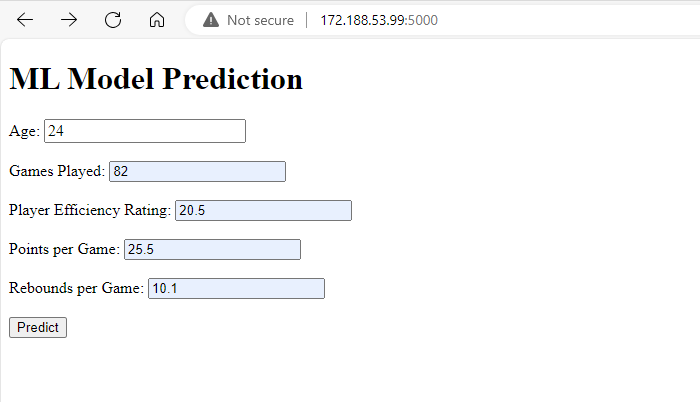